In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale

In [4]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [5]:
df.set_index('customer_id', inplace=True)

In [6]:
df.head(1)

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.7,71,7904.25


## Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [7]:
def plot_variable_pairs(df):
    """
    Takes:
          df
    Returns:
          PairGrid plot of all relationships
          with regression line
    """
    g=sns.PairGrid(df)
    g.map(sns.regplot)
    plt.show()

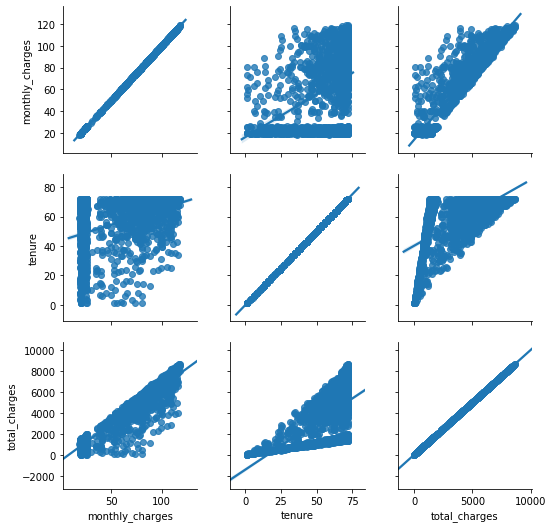

In [8]:
plot_variable_pairs(df)

## Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [15]:
def months_to_years(df):
    """
    Takes:
          df
    Returns:
          df with new feature "tenure_years"
    """
    df["tenure_years"] = round(df.tenure // 12).astype(object)
    return df

In [16]:
df = months_to_years(df)
df.head()

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,5
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6


In [17]:
df.tenure_years.value_counts()

5    676
6    343
4    265
3    166
2    103
1     83
0     59
Name: tenure_years, dtype: int64

In [18]:
# Validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 4 columns):
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
tenure_years       1695 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


## Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable.

- e.g. tenure_years with total_charges. 


- For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [51]:
def plot_categorical_and_continuous_vars(df):
    """
    Takes:
          df
    Returns:
          three plots of categorical var with continuous var
    """
    plt.figure(figsize=(16,12))
    
    plt.subplot(3, 1, 1)
    sns.lineplot(x="tenure_years", y="total_charges", data=df)
    plt.xlabel("Tenure in years")
    plt.ylabel("Total Charges in Dollars")
    plt.title('Total Charges by Tenure Group')
    
    plt.subplot(3, 1, 2)
    sns.catplot(x="tenure_years", y="total_charges", data=df, kind="swarm", palette='Blues')
    plt.xlabel("Tenure in years")
    plt.ylabel("Total Charges in Dollars")
    plt.title('Total Charges by Tenure Group')
    
    plt.subplot(3, 1, 3)
    sns.catplot(x="tenure_years", y="total_charges", data=df, kind="bar", palette='Purples')
    plt.xlabel("Tenure in years")
    plt.ylabel("Total Charges in Dollars")
    plt.title("Total Charges by Tenure")
    
    plt.show()

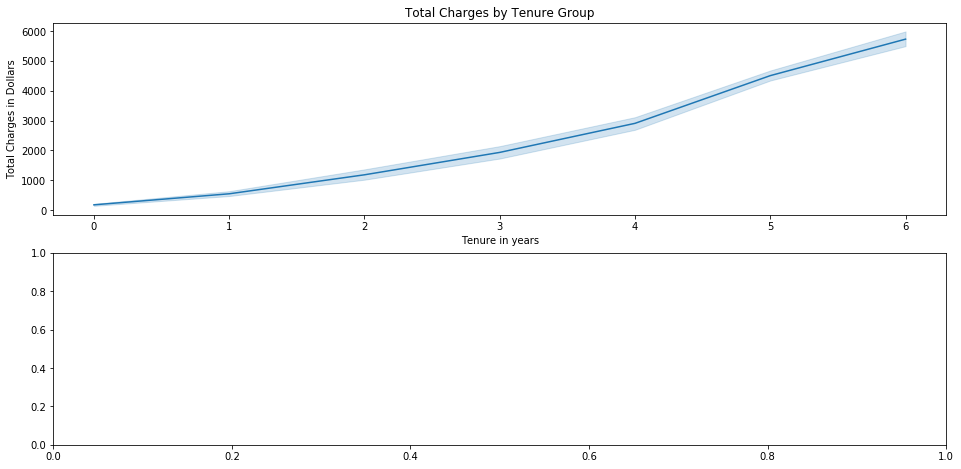

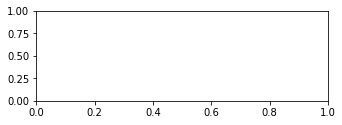

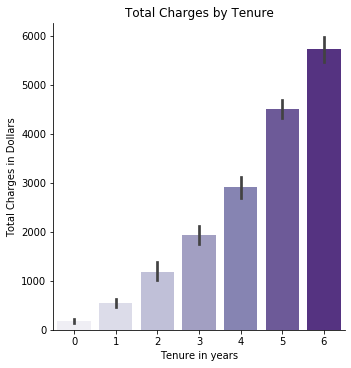

In [52]:
plot_categorical_and_continuous_vars(df)

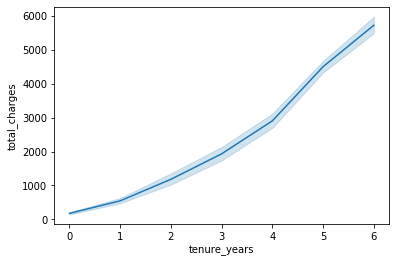

In [37]:
sns.lineplot(x="tenure_years", y="total_charges", data=df)

plt.show()

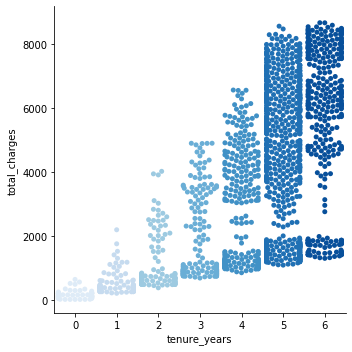

In [48]:
sns.catplot(x="tenure_years", y="total_charges", data=df, kind="swarm", palette='Blues')

plt.show()

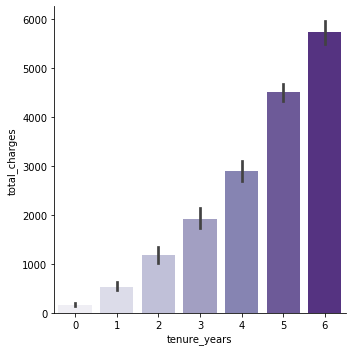

In [47]:
sns.catplot(x="tenure_years", y="total_charges", data=df, kind="bar", palette='Purples')

plt.show()

In [88]:
df.tenure_years

customer_id
0013-SMEOE    5
0014-BMAQU    5
0016-QLJIS    5
0017-DINOC    4
0017-IUDMW    6
             ..
9964-WBQDJ    5
9972-EWRJS    5
9975-GPKZU    3
9993-LHIEB    5
9995-HOTOH    5
Name: tenure_years, Length: 1695, dtype: object

# Object Oriented Approach, subplots method

- figure is the container holding our plots

- axes are the actual plots

- so our plot can contain more than one axis

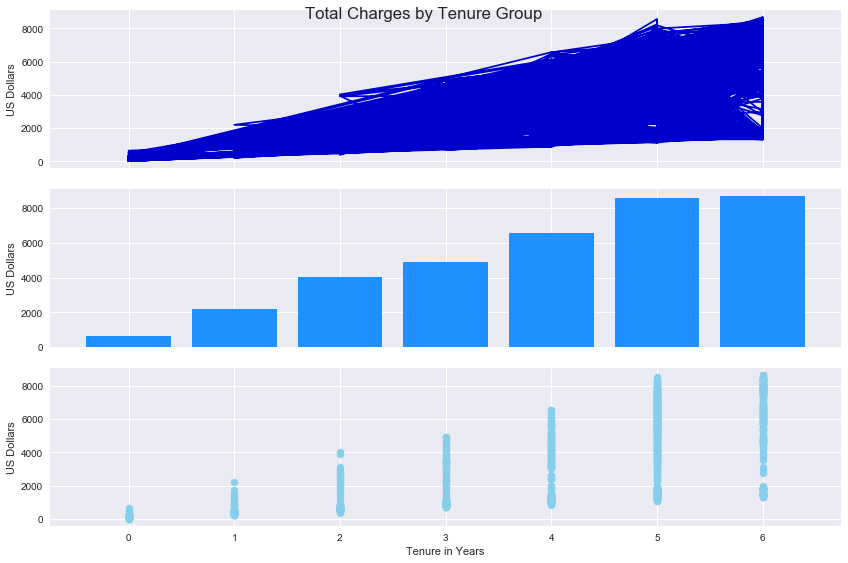

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,8), nrows=3,ncols=1, sharex=True)
plt.style.use('seaborn')

plt.suptitle('Total Charges by Tenure Group')

ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
ax1.set_ylabel('US Dollars')

ax2.bar(df.tenure_years, df.total_charges, color='dodgerblue')
ax2.set_ylabel('US Dollars')

ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
ax3.set_xlabel('Tenure in Years')
ax3.set_ylabel('US Dollars')

plt.tight_layout()
plt.show()


# How about some pie?

In [125]:
labels = ['0 years', '1 years', '2 years', '3 years', '4 years', '5 years', '6 years']
colors = ['royalblue', 'dodgerblue', 'lightskyblue', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke']
explode = (0.1, 0.1, 0, 0, 0, 0, 0) 

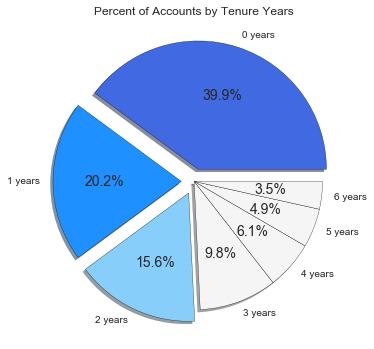

In [126]:
plt.pie(df.tenure_years.value_counts(), explode=explode, colors=colors, labels = labels, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Percent of Accounts by Tenure Years')
plt.show()